# Chapter 7: Interpolation

Robert Johansson

Updated source code listings for Numerical Python - A Practical Techniques Approach for Industry (ISBN 978-1-484205-54-9).

Updator: Kee-Youn Yoo

Interpolation is a mathematical method for constructing a function from a discrete set of data points. To perform interpolation in Python we use the `polynomial` module from Numpy and the `interpolate` module from Scipy.

## Importing modules

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "12"
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from numpy import polynomial as P
from scipy import interpolate
from scipy import linalg

## Interpolation

One-dimensional interpolation can be formulated as follows: for a given set of $n$ data point $\{(x_i,  y_i)\}_{i=1}^n$, find a function $f(x)$ such that $f(x_i) =  y_i$ for $i \in [1,n]$. The function $f(x)$ is known as the interpolant, and it is not unique. In
fact, there are an infinite number of functions that satisfy the interpolation criteria. Typically we can write
the interpolant as a linear combination of some basis functions $\phi_i(x)$, such that $f(x) = \sum_{j=1}^n c_j \phi_j(x)$,
where $c_j$ are unknown coefficients. Substituting the given data points into this linear combination results in a linear
equation system for the unknown coefficients: $\sum_{j=1}^n c_j \phi_j(x_i) = y_i$


$\begin{pmatrix}
\phi_1(x_1) & \phi_2(x_1) & \cdots & \phi_n(x_1)\\ 
\phi_1(x_2) & \phi_2(x_2) & \cdots & \phi_n(x_2)\\ 
\vdots & \vdots & \ddots  & \vdots\\ 
\phi_1(x_n) & \phi_2(x_n) & \cdots & \phi_n(x_n)
\end{pmatrix}
\begin{pmatrix}
c_1\\ 
c_2\\ 
\vdots\\ 
c_n
\end{pmatrix} =
\begin{pmatrix}
y_1\\ 
y_2\\ 
\vdots\\ 
y_n
\end{pmatrix}
$

or in a more compact implicit matrix form as $\Phi(\mathbf{x}) \mathbf{c} = \mathbf{y}$, where the elements of the matrix $\Phi(\mathbf{x})$ are $\{\Phi(\mathbf{x})\}_{ij} =\phi_j(x_i)$. Common choices of basis functions for
interpolation are various types of polynomials, for example, the power basis $\phi_j(x_i) = x_i^{j-1}$, or orthogonal
polynomials such as Legendre polynomials $\phi_j(x_i) = P_{j-1} (x_i)$, Chebyshev polynomials $\phi_j(x_i) = T_{j-1}(x_i)$, or
piecewise polynomials. Note that in general $f(x)$ is not unique, but for $n$ data points there is a unique
interpolating polynomial of order $n -1$, regardless of which polynomial basis we use. The structure of the $\Phi(\mathbf{x})$ matrix is different for different polynomial bases, and its condition
number and the computational cost of solving the interpolation problem varies correspondingly.

## Polynomials

The Numpy library contains the submodule `polynomial` (here imported as `P`), which provides functions
and classes for working with polynomials. In particular, it provides implementations of many standard
orthogonal polynomials

For example, we can create a representation of the polynomial $1+ 2x + 3x^2$ by passing the list `[1, 2, 3]` to the `Polynomial` class:

In [3]:
p1 = P.Polynomial([1,2,3]); p1

Polynomial([ 1.,  2.,  3.], [-1.,  1.], [-1.,  1.])

In the examples above, the first of the lists is the coefficient array and the second
and third lists are the `domain` and `window` attributes.

In [4]:
p1.coef, p1.domain, p1.window

(array([ 1.,  2.,  3.]), array([-1.,  1.]), array([-1.,  1.]))

Alternatively, we can also initialize a polynomial by specifying its roots using the class method
`P.Polynomial.fromroots`. The polynomial with roots at $x =-1$ and $x =1$, for example, can be created using:

In [5]:
p2 = P.Polynomial.fromroots([-1, 1]); p2

Polynomial([-1.,  0.,  1.], [-1.,  1.], [-1.,  1.])

---

The roots of a polynomial can be computed using the `roots` method

In [6]:
p1.roots()

array([-0.33333333-0.47140452j, -0.33333333+0.47140452j])

In [7]:
p2.roots()

array([-1.,  1.])

To evaluate the polynomial `p1` at the points $x =\{1.5,2.5,3.5\}$, we simply call the `p1`
class instance with a list of `x` values as this argument:

In [8]:
p1([1.5, 2.5, 3.5])

array([ 10.75,  24.75,  44.75])

Consider the division of the polynomial $ p_1(x) = (x - 3)(x - 2)(x -1)$ with the polynomial $p_2(x) = (x - 2)$.

In [9]:
p1 = P.Polynomial.fromroots([1, 2, 3])
p2 = P.Polynomial.fromroots([2])

In [10]:
p3 = p1 + p2; p3

Polynomial([ -8.,  12.,  -6.,   1.], [-1.,  1.], [-1.,  1.])

In [11]:
p4 = p1 -p2; p4

Polynomial([ -4.,  10.,  -6.,   1.], [-1.,  1.], [-1.,  1.])

In [12]:
p5 = p1 * p2; p5

Polynomial([ 12., -28.,  23.,  -8.,   1.], [-1.,  1.], [-1.,  1.])

In [13]:
p6 = p1 // p2; p6

Polynomial([ 3., -4.,  1.], [-1.,  1.], [-1.,  1.])

In [14]:
p6.roots()

array([ 1.,  3.])

In addition to the `Polynomial` class for polynomials in the standard power basis, the polynomial
module also has classes for representing polynomials in Chebyshev, Legendre, Laguerre and Hermite bases,
with the names `Chebyshev`, `Legendre`, `Laguerre`, `Hermite` (Physicists') and `HermiteE` (Probabilists'),
respectively.

For example, the Chebyshev polynomial with coefficient list `[1, 2, 3]`, that is, the polynomial
$T_0(x)+ 2T_1(x)+ 3T_2(x)$, where $T_i(x)$ is the Chebyshev polynomial of order $i$, can be created using:

In [15]:
c1 = P.Chebyshev([1, 2, 3]); c1

Chebyshev([ 1.,  2.,  3.], [-1.,  1.], [-1.,  1.])

In [16]:
c1.roots()

array([-0.76759188,  0.43425855])

---

In [17]:
c1 = P.Chebyshev.fromroots([-1, 1]); c1

Chebyshev([-0.5,  0. ,  0.5], [-1.,  1.], [-1.,  1.])

In [18]:
l1 = P.Legendre.fromroots([-1, 1]); l1

Legendre([-0.66666667,  0.        ,  0.66666667], [-1.,  1.], [-1.,  1.])

In [19]:
c1([-0.5, 0, 1])

array([-0.75, -1.  ,  0.  ])

In [20]:
l1([-0.5, 0, 1])

array([-0.75, -1.  ,  0.  ])

## Polynomial interpolation

To solve the interpolation problem we need to first evaluate the matrix $\Phi(\mathbf(x))$ for a given basis, and then solve the
resulting linear equation system $\Phi(\mathbf{x}) \mathbf{c}=\mathbf{y}$. Each of the polynomial classes in `polynomial` provides a function for computing the (generalized) Vandermonde matrix for the corresponding basis.

For example, consider the data points $(1, 1)$, $(2, 3)$, $(3, 5)$, and $(4, 4)$.

In [21]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 3, 5, 4])

To interpolate a polynomial through these points, we need to use a polynomial of third degree (number
of data points minus one). For interpolation in the power basis, we seek the coefficients ci such that $f(x) = \sum_{i=1}^4 c_i x^{i-1} = c_1 x^0 +c_2 x^1 +c_3 x^2 +c_4 x^3$, and to find these coefficients we evaluate the Vandermonde matrix
and solve the interpolation equation system:

In [22]:
deg = len(x) - 1
A = P.polynomial.polyvander(x, deg)
c = linalg.solve(A, y); c

array([ 2. , -3.5,  3. , -0.5])

The interpolation polynomial is thus $f(x) = 2 - 3.5x + 3x^2 - 0.5x^3$.

In [23]:
f1 = P.Polynomial(c)

In [24]:
f1(2.5)

4.1875

---

To perform this polynomial interpolation in another polynomial basis, all that we need to change is
the name of the function that was used to generate the Vandermonde matrix `A` in the previous example.

In [25]:
A = P.chebyshev.chebvander(x, deg)
c = linalg.solve(A, y); c

array([ 3.5  , -3.875,  1.5  , -0.125])

The interpolation polynomial in the Chebyshev basis is $f(x) = 3.5T_0(x) - 3.875T_1(x) + 1.5T_2(x) - 0.125T_3(x)$.

In [26]:
f2 = P.Chebyshev(c)

In [27]:
f2(2.5)

4.1874999999999982

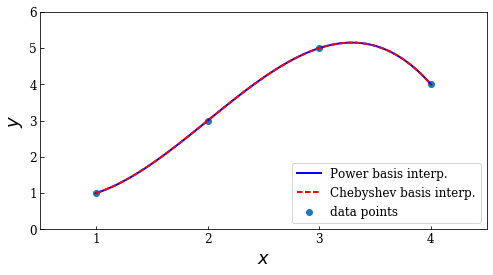

In [28]:
xx = np.linspace(x.min(), x.max(), 100)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(xx, f1(xx), 'b', lw=2, label='Power basis interp.')
ax.plot(xx, f2(xx), 'r--', lw=2, label='Chebyshev basis interp.')
ax.scatter(x, y, label='data points')

ax.legend(loc=4)
ax.tick_params(which='both', direction='in')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(0, 6)
ax.set_xticks(x)
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18);

#fig.tight_layout()

In [29]:
f1b = P.Polynomial.fit(x, y, deg); f1b

Polynomial([ 4.1875,  3.1875, -1.6875, -1.6875], [ 1.,  4.], [-1.,  1.])

In [30]:
f2b = P.Chebyshev.fit(x, y, deg); f2b

Chebyshev([ 3.34375 ,  1.921875, -0.84375 , -0.421875], [ 1.,  4.], [-1.,  1.])

Mapping the interpolation data into the range that is most
suitable for a specific basis can significantly improve the numerical stability of the interpolation. For
example, using the Chebyshev basis with $x$ values that are scaled such that $x \in [-1,1]$, rather than the original
$x$ values in the previous example, reduces the condition number from almost $4660$ to about $1.85$:

In [31]:
np.linalg.cond(P.chebyshev.chebvander(x, deg))

4659.7384241402833

In [32]:
np.linalg.cond(P.chebyshev.chebvander((2*x-5)/3.0, deg))

1.8542033440472896

Note that with `fit` method, the `domain` attribute of the resulting instances are automatically set to the
appropriate `x` values of the data points (in this example, the input range is `[1, 4]`), and the coefficients are
adjusted accordingly. To illustrate the problem, the values of the Chebyshev polynomials up to degree 5 are plotted below.

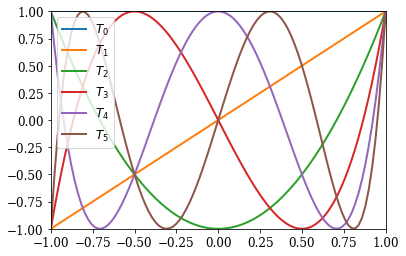

In [33]:
x = np.linspace(-1, 1, 100)

for i in range(6): 
    ax = plt.plot(x, P.Chebyshev.basis(i)(x), lw=2, label="$T_%d$" % i)
plt.legend(loc=2)
plt.xlim(-1, 1)
plt.ylim(-1, 1);

In the range $-1 <= x <= 1$ they are nice, equiripple functions. The same plots over the range $-2 <= x <= 2$ look very different:

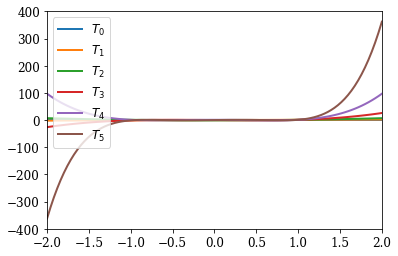

In [34]:
x = np.linspace(-2, 2, 100)

for i in range(6): 
    ax = plt.plot(x, P.Chebyshev.basis(i)(x), lw=2, label="$T_%d$" % i)
plt.legend(loc=2)
plt.xlim(-2, 2)
plt.ylim(-400, 400);

---

High-order polynomial interpolation can have undesirable behavior between the interpolation points. Although the interpolation is exact at the given data points, a high-order polynomial can vary wildly between the specified points. This is famously illustrated by
polynomial interpolation of Runge's function $f(x) = 1/(1+ 25x^2)$ using evenly spaced sample points in the
interval $[-1,1]$. The result is an interpolant that nearly diverges between the data points near the end of the
interval.

In [35]:
def runge(x):
    return 1/(1 + 25*x**2)

def runge_interpolate(n):
    x = np.linspace(-1, 1, n +1)
    p = P.Polynomial.fit(x, runge(x), deg=n)
    return x, p

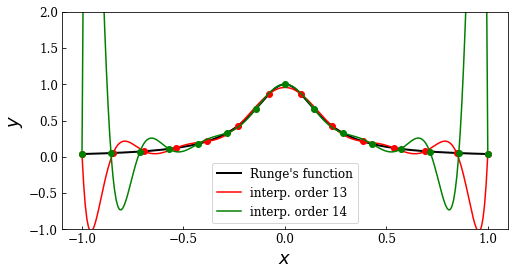

In [36]:
xx = np.linspace(-1, 1, 250)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(xx, runge(xx), 'k', lw=2, label="Runge's function")

# 13th order interpolation of the Runge function
n = 13
x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'ro')
ax.plot(xx, p(xx), 'r', label='interp. order %d' % n)

# 14th order interpolation of the Runge function
n = 14
x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'go')
ax.plot(xx, p(xx), 'g', label='interp. order %d' % n)

ax.legend(loc=8)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1, 2)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)

ax.tick_params(which='both', direction='in')

## Spline interpolation

For a set of $n$ data points $\{x_i, y_i\}$, there are $n -1$ subintervals $[x_i,\; x_{i+1}]$ in the full range of the data $[x_0,\; x_n]$. To interpolate the $n$ data points using piecewise polynomials of degree
$k$ on each of the subintervals, we must determine $(k +1)(n -1)$ unknown parameters. 
The values at the knots give $2(n -1)$ equations. Additional equations can be obtained
by requiring also that derivatives and higher-order derivatives are continuous at the knots.

A spline is a special type of piecewise polynomial interpolant: a piecewise polynomial of degree $k$ is a
spline if it is continuously differentiable $k -1$ times. The most popular choice is the third-order spline, $k = 3$,
which requires $4(n -1)$ parameters. For this case, the continuity of two derivatives at the $n -2$ knots gives
$2(n - 2)$ additional equations, bringing the total number of equations to $2(n -1)+ 2(n - 2) = 4(n -1)- 2$.
There are therefore two remaining undetermined parameters, which must be determined by other means.
A common approach is to additionally require that the second order derivatives at the end points are zero
(resulting in the natural spline). This gives two more equations, which closes the equation system.

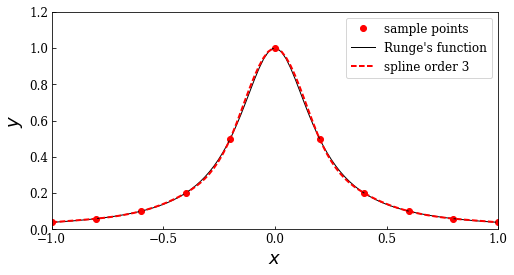

In [37]:
x = np.linspace(-1, 1, 11)
y = runge(x)

f_i = interpolate.interp1d(x, y, kind=3)

xx = np.linspace(-1, 1, 100)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y, 'ro', label='sample points')
ax.plot(xx, runge(xx), 'k', lw=1, label="Runge's function")
ax.plot(xx, f_i(xx), 'r--', lw=2, label='spline order 3')
ax.legend()

ax.set_xlim(-1, 1)
ax.set_ylim(0, 1.2)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)

ax.tick_params(which='both', direction='in')

To illustrate the effect of the order of a spline interpolation, consider the problem of interpolating the
data $(0,3)$, $(1, 4)$, $(2, 3.5)$, $(4, 2)$, $(5, 1.5)$, $(6, 1.25)$, and $(7, 0.7)$ with splines of increasing order.

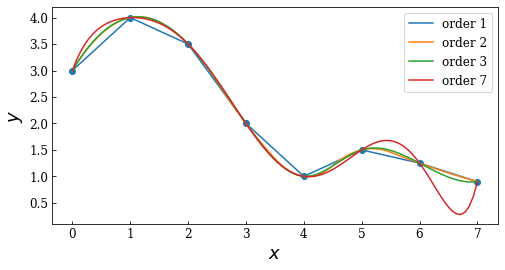

In [38]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7])
y = np.array([3, 4, 3.5, 2, 1, 1.5, 1.25, 0.9])

xx = np.linspace(x.min(), x.max(), 100)

fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x, y)

for n in [1, 2, 3, 7]:
    f = interpolate.interp1d(x, y, kind=n)
    ax.plot(xx, f(xx), label='order %d' % n)
    
ax.legend()
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)

ax.tick_params(which='both', direction='in')

## Multivariate interpolation

In [39]:
def f(x, y):
    return np.exp(-(x + 0.5)**2 - 2*(y + 0.5)**2) - np.exp(-(x - 0.5)**2 - 2*(y - 0.5)**2)

x = y = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x, y)

# simulate noisy data at fixed grid points X, Y
Z = f(X, Y) + 0.05*np.random.randn(*X.shape)

f_i = interpolate.interp2d(x, y, Z, kind='cubic')

xx = yy = np.linspace(x.min(), x.max(), 100)
XX, YY = np.meshgrid(xx, yy)

ZZi = f_i(xx, yy)

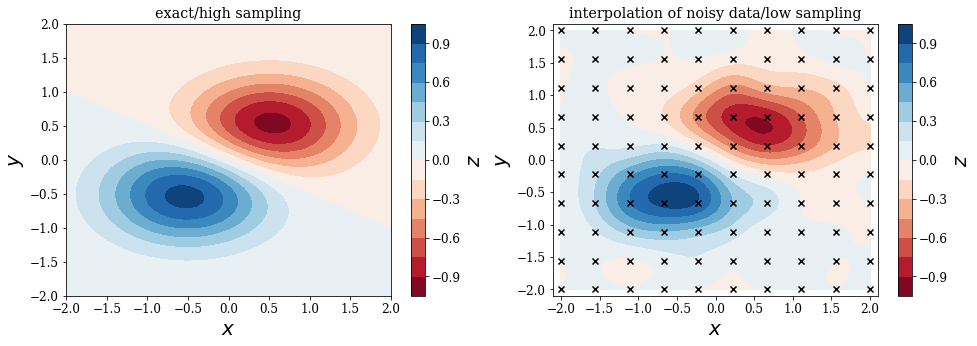

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

c = axes[0].contourf(XX, YY, f(XX, YY), 15, cmap=plt.cm.RdBu)
axes[0].set_xlabel(r"$x$", fontsize=20)
axes[0].set_ylabel(r"$y$", fontsize=20)
axes[0].set_title("exact/high sampling")
cb = fig.colorbar(c, ax=axes[0])
cb.set_label(r"$z$", fontsize=20)

c = axes[1].contourf(XX, YY, ZZi, 15, cmap=plt.cm.RdBu)
axes[1].set_ylim(-2.1, 2.1)
axes[1].set_xlim(-2.1, 2.1)
axes[1].set_xlabel(r"$x$", fontsize=20)
axes[1].set_ylabel(r"$y$", fontsize=20)
axes[1].scatter(X, Y, marker='x', color='k')
axes[1].set_title("interpolation of noisy data/low sampling")
cb = fig.colorbar(c, ax=axes[1])
cb.set_label(r"$z$", fontsize=20)

For higher-dimensional problems, there is a function `interpolate.interpnd`, which is a
generalization to $n$-dimensional problems.

Another typical situation that requires multivariate interpolation occurs when sampled data is given
on an irregular coordinate grid. To be able to easily plot and analyze such data with existing tools, it may be desirable to
interpolate it onto a regular coordinate grid. In Scipy we can use the `interpolate.griddata` for exactly this
task.

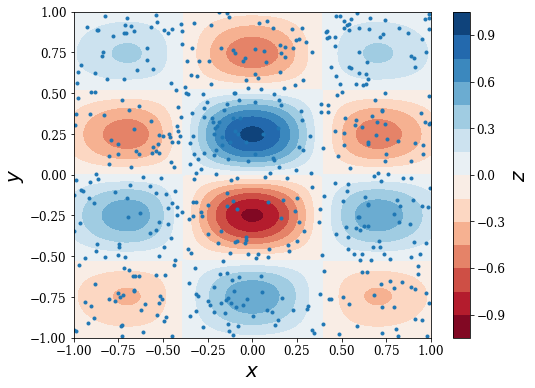

In [41]:
def f(x, y):
    return np.exp(-x**2 - y**2) * np.cos(4*x) * np.sin(6*y)

x = y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

np.random.seed(115925231)
N = 500
xdata = np.random.uniform(-1, 1, N)
ydata = np.random.uniform(-1, 1, N)
zdata = f(xdata, ydata)

fig, ax = plt.subplots(figsize=(8, 6))

c = ax.contourf(X, Y, Z, 15, cmap=plt.cm.RdBu);
ax.scatter(xdata, ydata, marker='.')
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)

cb = fig.colorbar(c, ax=ax)
cb.set_label(r"$z$", fontsize=20)

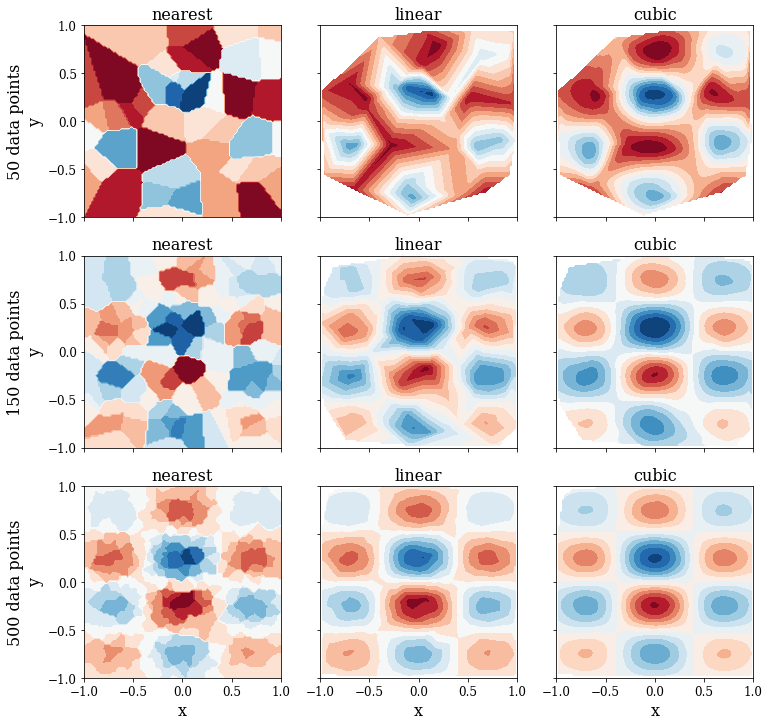

In [42]:
def z_interpolate(xdata, ydata, zdata):
    Zi_0 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='nearest')
    Zi_1 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='linear')
    Zi_3 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='cubic')
    return Zi_0, Zi_1, Zi_3

fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)

n_vec = [50, 150, 500]

for idx, n in enumerate(n_vec):
    Zi_0, Zi_1, Zi_3 = z_interpolate(xdata[:n], ydata[:n], zdata[:n])
    axes[idx, 0].contourf(X, Y, Zi_0, 15, cmap=plt.cm.RdBu)
    axes[idx, 0].set_ylabel("%d data points\ny" % n, fontsize=16)
    axes[idx, 0].set_title("nearest", fontsize=16)
    axes[idx, 1].contourf(X, Y, Zi_1, 15, cmap=plt.cm.RdBu)
    axes[idx, 1].set_title("linear", fontsize=16)
    axes[idx, 2].contourf(X, Y, Zi_3, 15, cmap=plt.cm.RdBu)
    axes[idx, 2].set_title("cubic", fontsize=16)

for m in range(len(n_vec)):
    axes[idx, m].set_xlabel("x", fontsize=16)

## Versions

In [43]:
%reload_ext version_information
%version_information scipy, numpy, matplotlib

Software versions
Python 3.4.2 32bit [GCC 4.9.1]
IPython 6.0.0
OS Linux 4.9.24 v7+ armv7l with debian 8.0
scipy 0.19.0
numpy 1.8.2
matplotlib 2.0.0
Tue May 09 02:55:07 2017 KST